# Importing data and python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/My\ Drive/credit/
!ls

/content/gdrive/My Drive/credit
BankChurners.csv


In [3]:
df=pd.read_csv('BankChurners.csv')

In [4]:
df.head()

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                
3  769911858  ...                                            0.99987                                                                                
4  709106358  ...                                            0.99998                                                                                

[5 rows x 23 columns]

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# deleting uneccessary columns
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [7]:
df.head()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.describe()

CLIENTNUM  Customer_Age  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
count  1.012700e+04  10127.000000  ...         10127.000000           10127.000000
mean   7.391776e+08     46.325960  ...             0.712222               0.274894
std    3.690378e+07      8.016814  ...             0.238086               0.275691
min    7.080821e+08     26.000000  ...             0.000000               0.000000
25%    7.130368e+08     41.000000  ...             0.582000               0.023000
50%    7.179264e+08     46.000000  ...             0.702000               0.176000
75%    7.731435e+08     52.000000  ...             0.818000               0.503000
max    8.283431e+08     73.000000  ...             3.714000               0.999000

[8 rows x 15 columns]

In [10]:
#dropping duplicates
df=df.drop_duplicates()

In [11]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [12]:
#checking null values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
del df['CLIENTNUM']

In [14]:
categorical_columns=['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

In [15]:
numerical_columns=['Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]

# Exploratory data analysis

Data distribution of features from dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bdd621c50>,
      dtype=object)

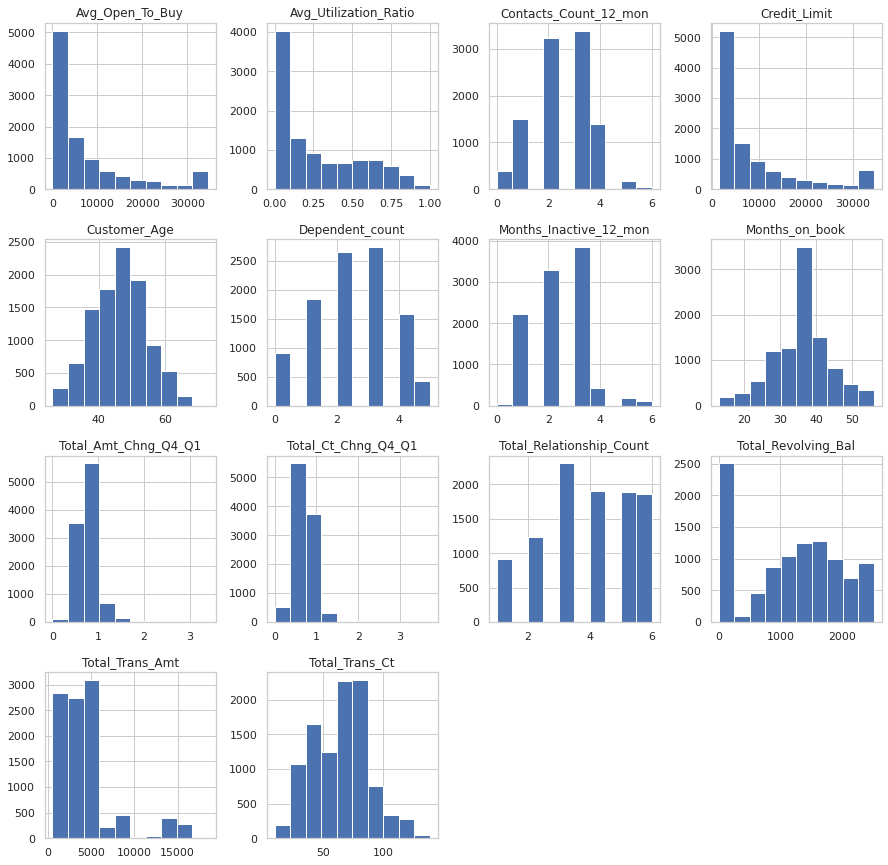

In [16]:
df.hist(figsize=(15,15))

Exploration of categorical columns

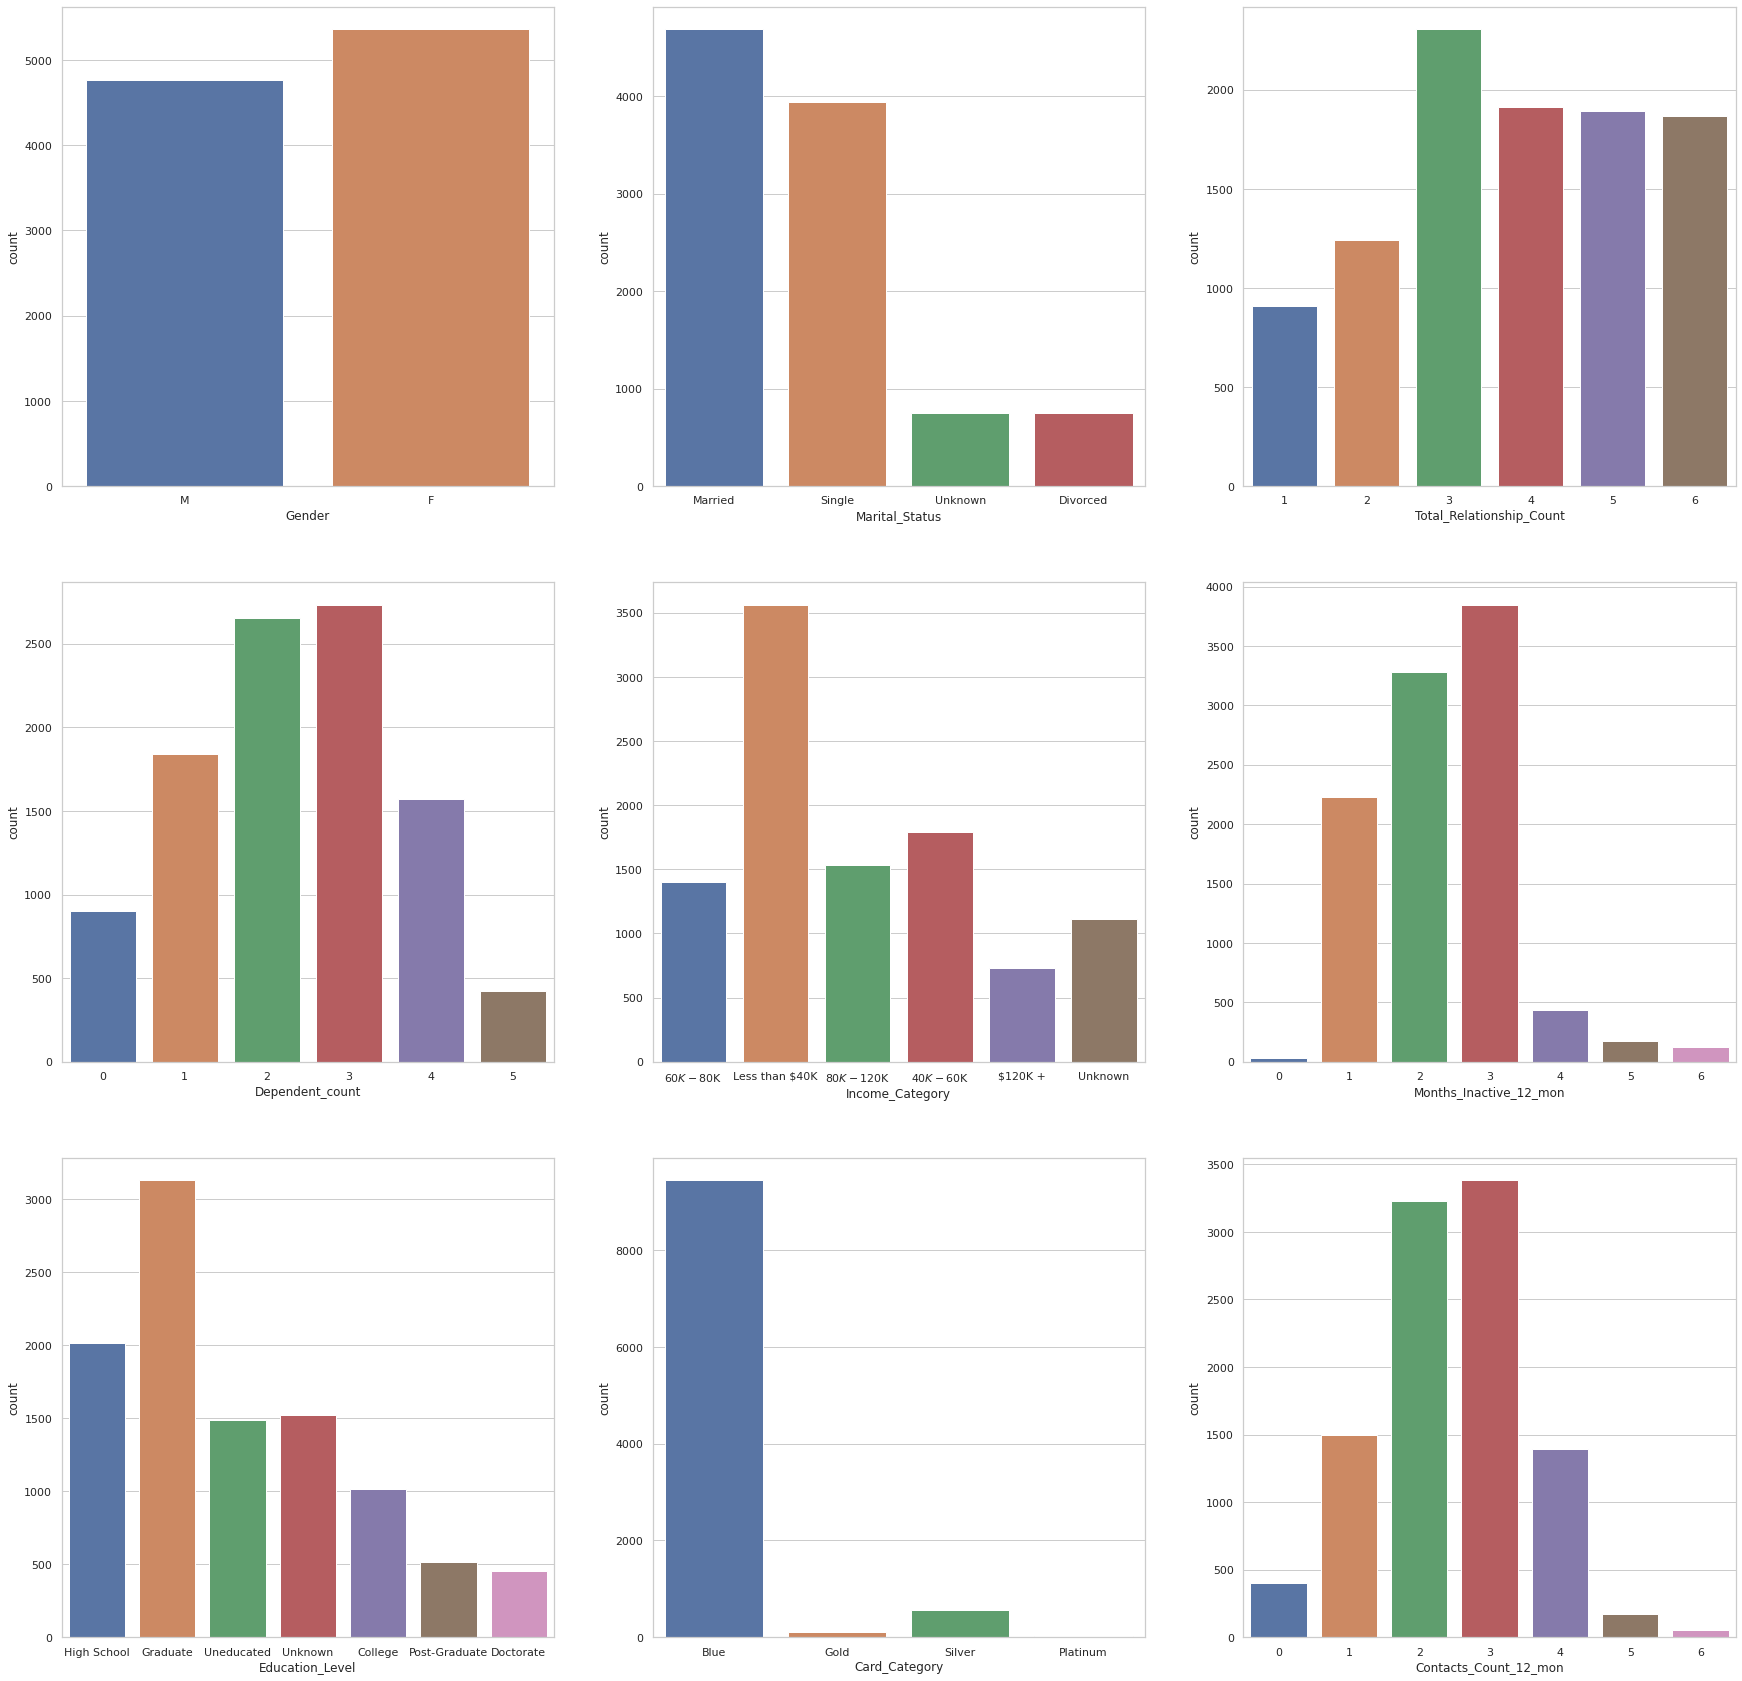

In [17]:
f, axes = plt.subplots(3,3 , figsize=(30, 30))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, x = df[feature], ax=axes[i%3, i//3])

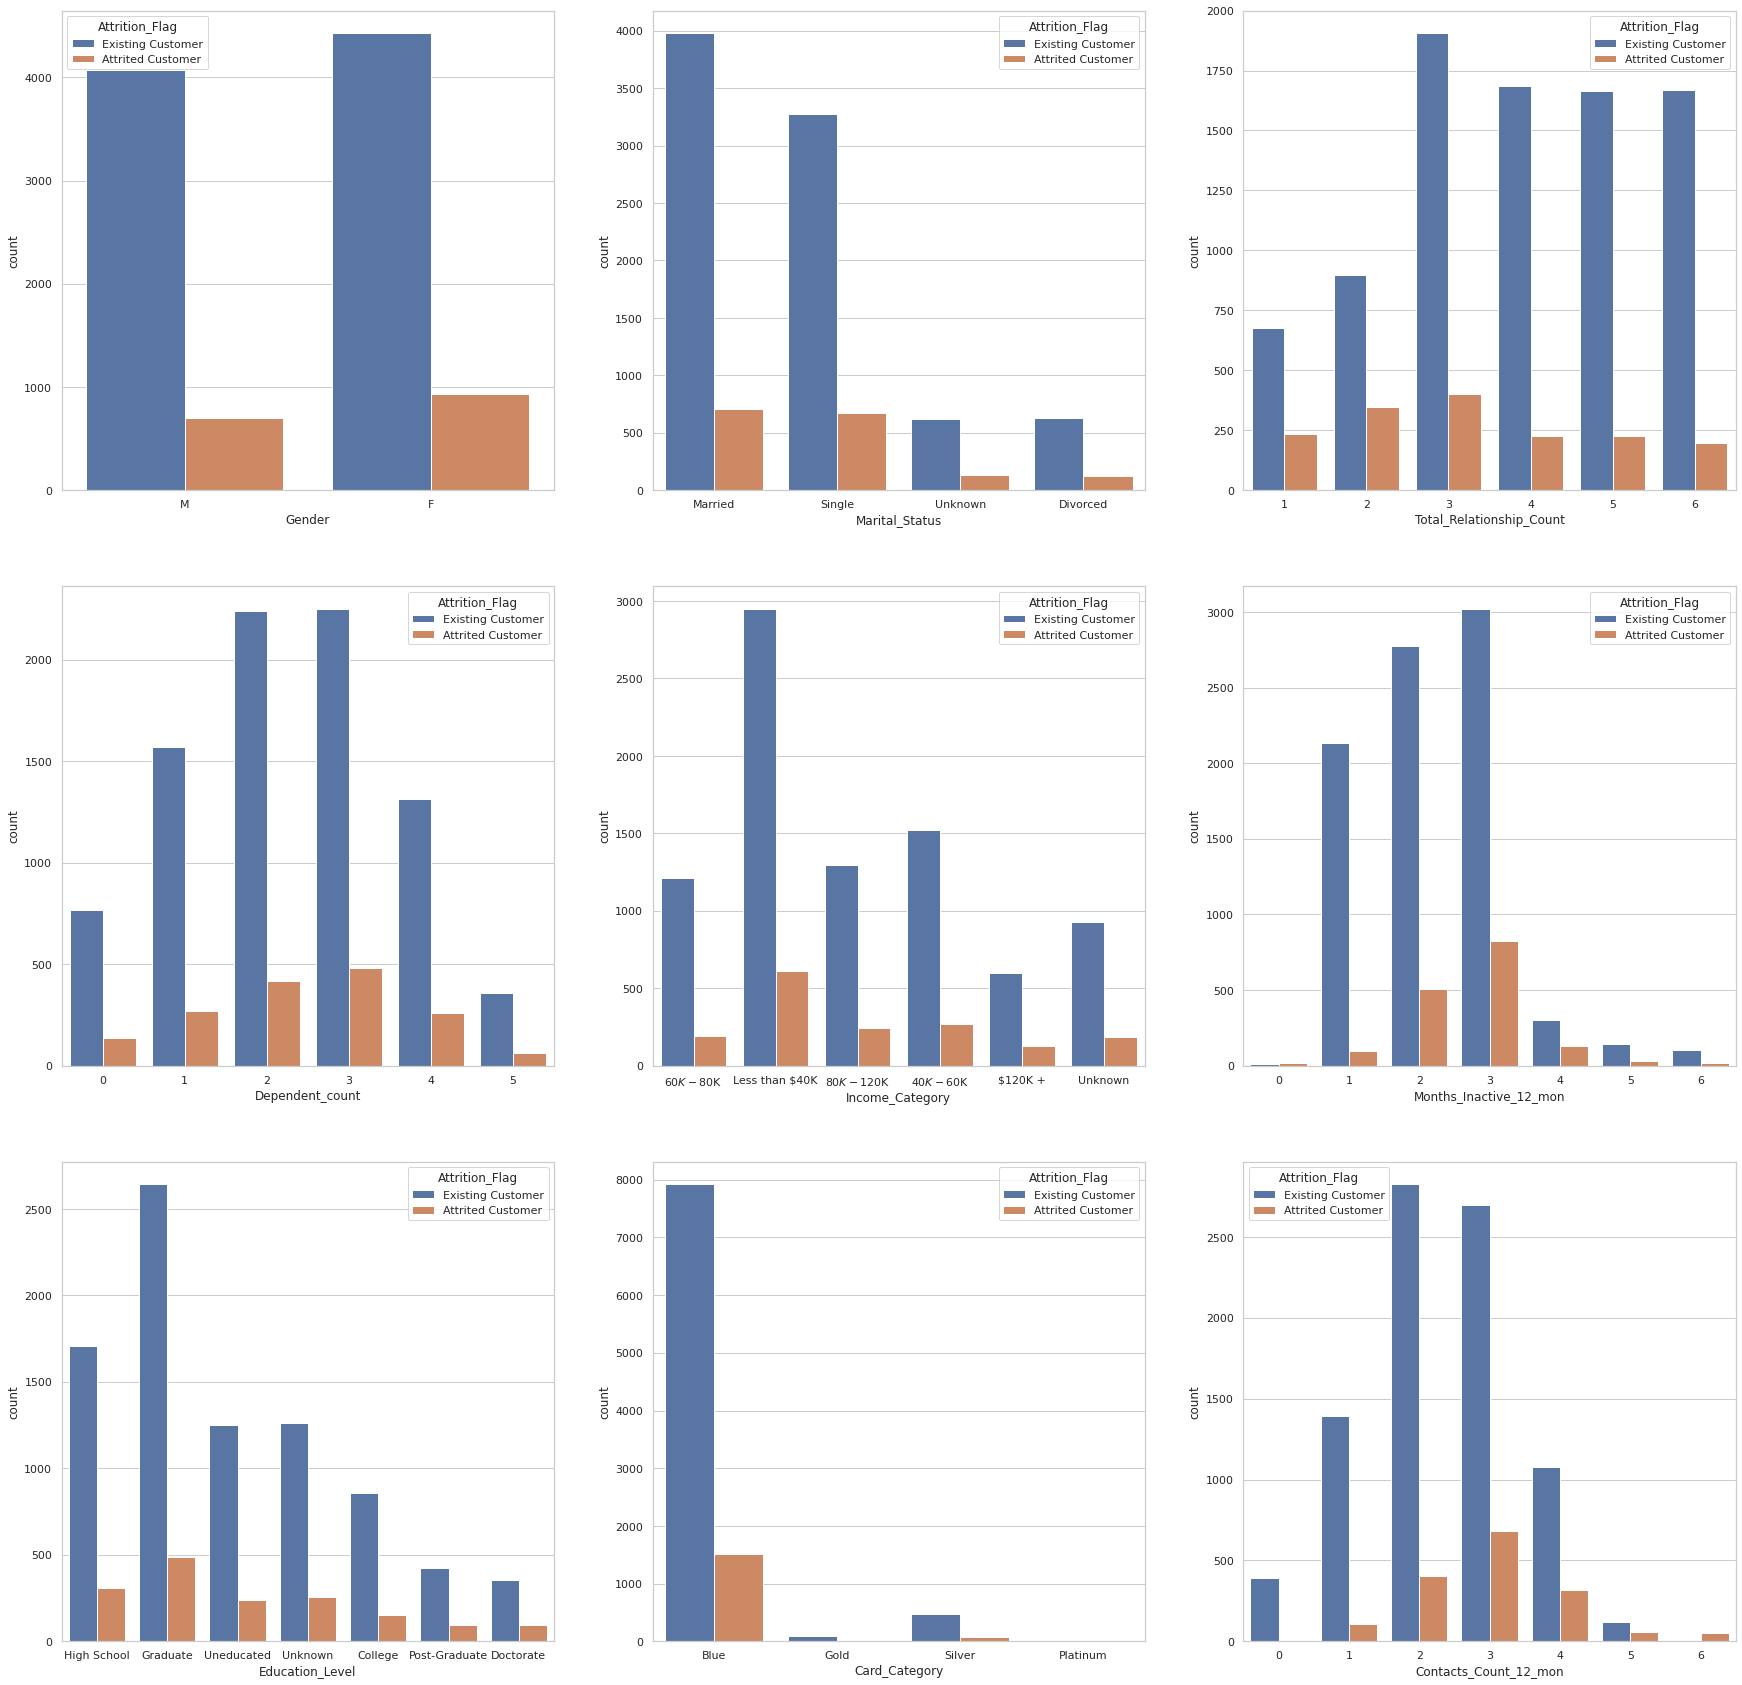

In [18]:
f, axes = plt.subplots(3,3 , figsize=(30, 30))
for i, feature in enumerate(categorical_columns):
  sns.countplot(x=df[feature],hue=df["Attrition_Flag"],ax=axes[i%3, i//3])
  


Exploration of age

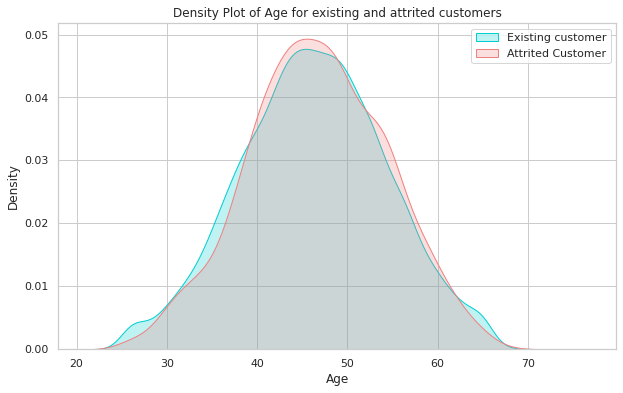

In [19]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df["Customer_Age"][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df["Customer_Age"][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Age for existing and attrited customers')
ax.set(xlabel='Age')
plt.show()

In [20]:
numerical_columns

['Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Exploration of Months on Book

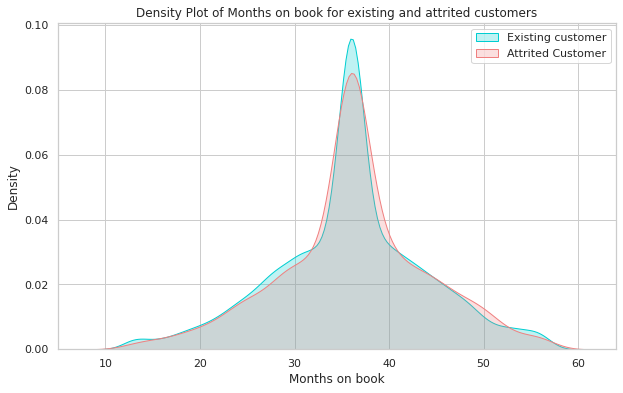

In [21]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Months_on_book'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Months_on_book'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Months on book for existing and attrited customers')
ax.set(xlabel='Months on book')
plt.show()

Exploration of credit limit

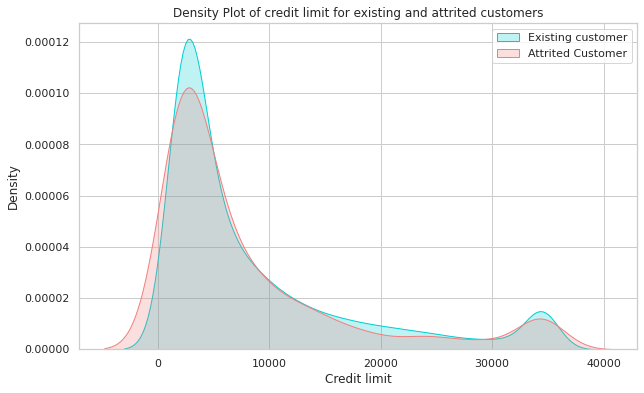

In [22]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Credit_Limit'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Credit_Limit'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of credit limit for existing and attrited customers')
ax.set(xlabel='Credit limit')
plt.show()

Exploration of Total_Revolving_Bal

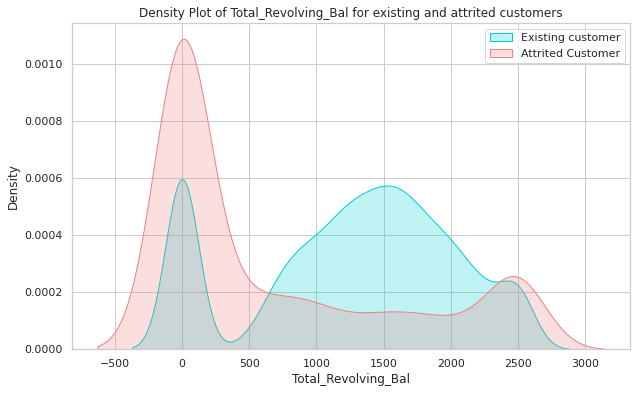

In [23]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Total_Revolving_Bal'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total_Revolving_Bal'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Total_Revolving_Bal for existing and attrited customers')
ax.set(xlabel='Total_Revolving_Bal')
plt.show()

Exploration of Avg_Open_To_Buy

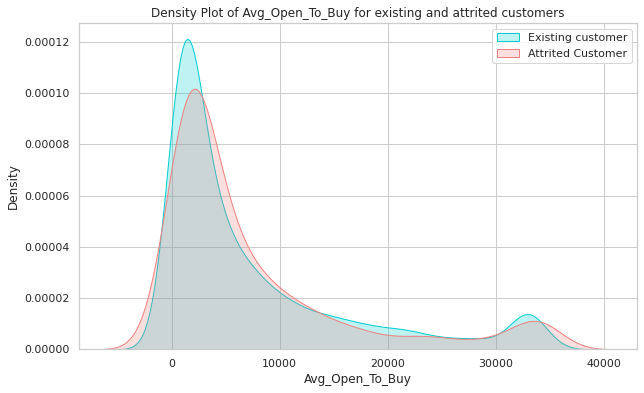

In [24]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Avg_Open_To_Buy'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Avg_Open_To_Buy'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Avg_Open_To_Buy for existing and attrited customers')
ax.set(xlabel='Avg_Open_To_Buy')
plt.show()

Exploration of Total_Amt_Chng_Q4_Q1

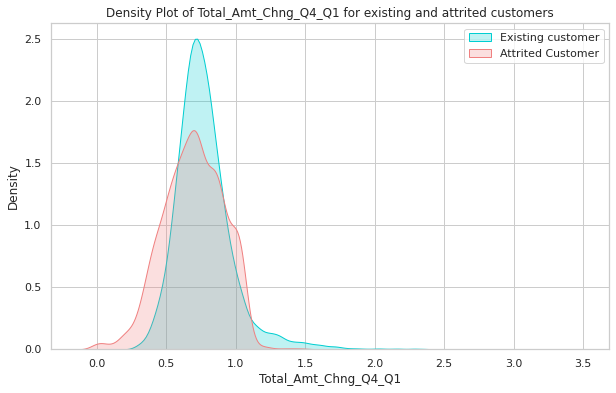

In [25]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Total_Amt_Chng_Q4_Q1'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total_Amt_Chng_Q4_Q1'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Total_Amt_Chng_Q4_Q1 for existing and attrited customers')
ax.set(xlabel='Total_Amt_Chng_Q4_Q1')
plt.show()

Exploration of Total_Trans_Amt

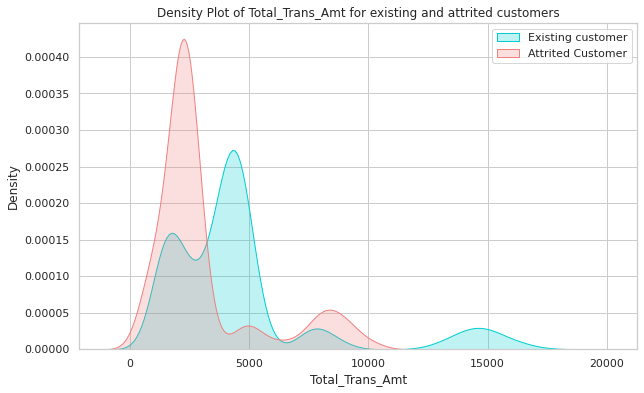

In [26]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Total_Trans_Amt'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total_Trans_Amt'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Total_Trans_Amt for existing and attrited customers')
ax.set(xlabel='Total_Trans_Amt')
plt.show()

Exploration of Total_Trans_Ct

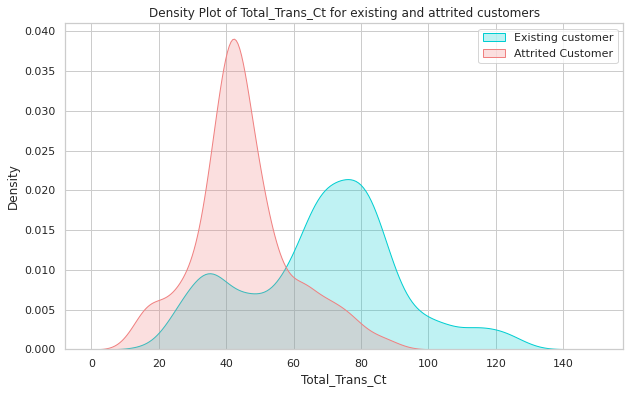

In [27]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Total_Trans_Ct'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total_Trans_Ct'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Total_Trans_Ct for existing and attrited customers')
ax.set(xlabel='Total_Trans_Ct')
plt.show()

Exploration of Total_Ct_Chng_Q4_Q1

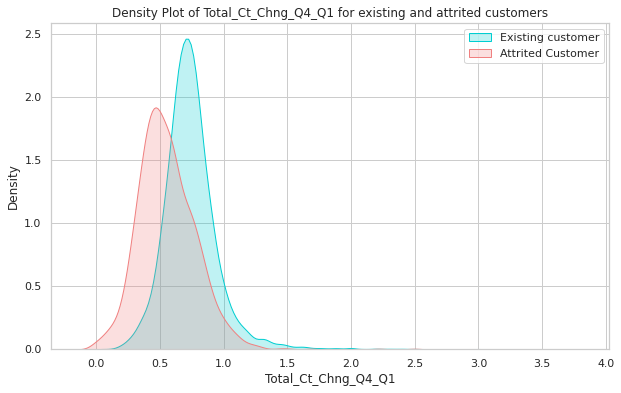

In [28]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Total_Ct_Chng_Q4_Q1'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Total_Ct_Chng_Q4_Q1'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Total_Ct_Chng_Q4_Q1 for existing and attrited customers')
ax.set(xlabel='Total_Ct_Chng_Q4_Q1')
plt.show()

Exploration of Avg_Utilization_Ratio

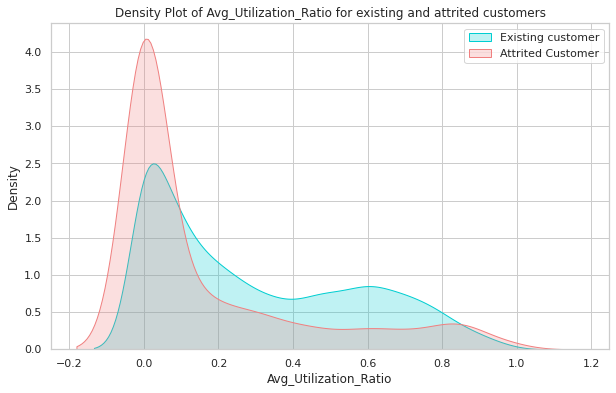

In [29]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(df['Avg_Utilization_Ratio'][df.Attrition_Flag == 'Existing Customer'], color="darkturquoise", shade=True)
sns.kdeplot(df['Avg_Utilization_Ratio'][df.Attrition_Flag == 'Attrited Customer'], color="lightcoral", shade=True)
plt.legend(['Existing customer', 'Attrited Customer'])
plt.title('Density Plot of Avg_Utilization_Ratio for existing and attrited customers')
ax.set(xlabel='Avg_Utilization_Ratio')
plt.show()

Exploration of Attrition Flag

Text(0.5, 1.0, 'Countplot of Existing and Attrited Customers')

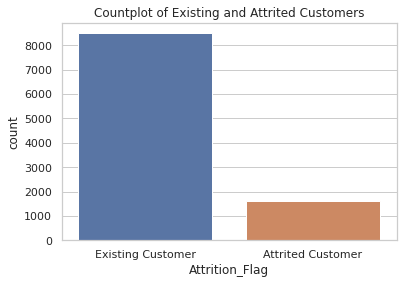

In [30]:
sns.countplot(x=df['Attrition_Flag'])
plt.title('Countplot of Existing and Attrited Customers')

Heatmap

In [31]:
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

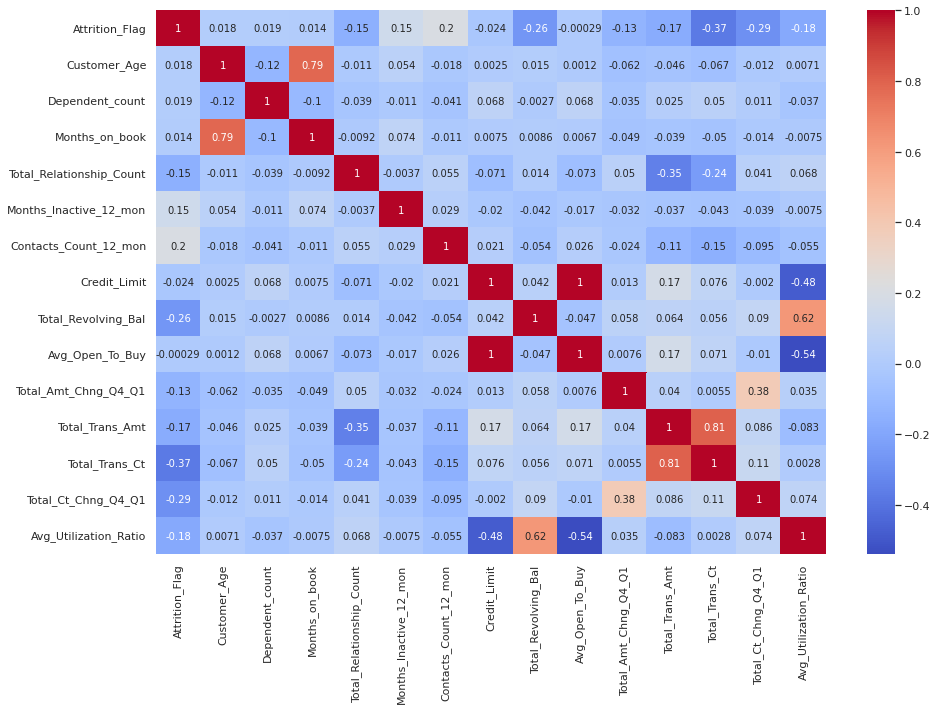

In [32]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

# Feature selection

In [33]:
y=df['Attrition_Flag']
X=df.drop(['Attrition_Flag'], axis=1)

In [34]:
X.head()

Customer_Age Gender  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0            45      M  ...                1.625                 0.061
1            49      F  ...                3.714                 0.105
2            51      M  ...                2.333                 0.000
3            40      F  ...                2.333                 0.760
4            40      M  ...                2.500                 0.000

[5 rows x 19 columns]

In [35]:
X=pd.get_dummies(X, drop_first=True)

In [36]:
len(X.columns)

32

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))

                             Specs          Score
10                 Total_Trans_Amt  754246.053313
7              Total_Revolving_Bal  400235.401723
6                     Credit_Limit   55227.259276
11                  Total_Trans_Ct   11865.365976
5            Contacts_Count_12_mon     211.039445
3         Total_Relationship_Count     144.398171
4           Months_Inactive_12_mon     102.667123
13           Avg_Utilization_Ratio      89.116891
12             Total_Ct_Chng_Q4_Q1      67.802873
9             Total_Amt_Chng_Q4_Q1      10.998295
8                  Avg_Open_To_Buy       9.105136
15       Education_Level_Doctorate       8.355706
14                        Gender_M       7.443223
25     Income_Category_$60K - $80K       6.948616
0                     Customer_Age       4.654893
2                   Months_on_book       3.367526
27  Income_Category_Less than $40K       3.313865
21          Marital_Status_Married       3.064753
1                  Dependent_count       2.626071


In [39]:
#Assigning features with highest scores to X_final
X_final=X[['Total_Trans_Amt', 'Total_Revolving_Bal', 'Credit_Limit', 'Total_Trans_Ct']]

In [40]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xf=scaler.fit_transform(X_final)

In [41]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size=0.2, random_state=2, stratify=y)

# LGBM model

In [46]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [63]:
params = {
    'max_depth':[3,5,7,9,'max'],
    'n_estimators': [100, 150, 200, 250, 300],
    'num_leaves': [20, 25, 35, 40, 45],
    'learning_rate': [0.0001, 0.0005, 0.001,0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
    }

In [64]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=lgb.LGBMClassifier(),
             param_grid=params,
             scoring = 'roc_auc',
             n_jobs = -1,
             cv = 3,
             verbose=1
            )

In [65]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 1375 candidates, totalling 4125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2010 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2836 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4125 out of 4125 | elapsed:  7.9min finished


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.0005, 0.001, 0.05, 0.1,
                                           0.2, 0.5, 1, 2, 5, 10],
                         'max_depth': [3, 5, 7, 9, 'max'],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'num_leaves': [20, 25, 35, 40, 45]},
             scoring='roc_auc', verbose=1)

In [66]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20}

In [67]:
lgb2=lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=20)

In [68]:
lgb2.fit(X_train, y_train)

LGBMClassifier(max_depth=3, num_leaves=20)

In [69]:
y_pred=lgb2.predict(X_test)

In [70]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-Score: {f1}')

Accuracy: 0.9348469891411648
Precision: 0.8614232209737828
Recall: 0.7076923076923077
F1-Score: 0.7770270270270271


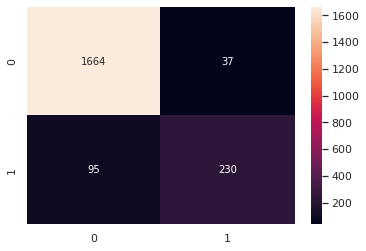

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')